In [75]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('/home/ramo/Scrivania/Analysis/data.csv', index_col='Counter')

In [77]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,ndvi,LuminositaNotturna
Counter,,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,0,35.0
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,0,48.0
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,0,201.0
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,0,77.0
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,0,64.0
...,...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,520,NaN
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,0,NaN
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,0,NaN


In [78]:
#calcolo campo magnetico
data['mag'] = np.sqrt(data['Mag_x']**2 + data['Mag_y']**2 + data['Mag_z']**2) 

In [79]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,ndvi,LuminositaNotturna,mag
Counter,,,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,0,35.0,5.200727
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,0,48.0,9.323103
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,0,201.0,12.628853
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,0,77.0,14.890080
5,2022-04-21 05:39:12.469331,-44.457227,-85.981789,4.654647,-8.031365,-14.098703,dark,other,0,64.0,16.880225
...,...,...,...,...,...,...,...,...,...,...,...
538,2022-04-21 08:02:41.653962,34.686166,75.106496,-9.272785,-14.423191,28.266285,light,other,520,NaN,33.060488
539,2022-04-21 08:02:57.823660,33.992827,75.987179,-9.712952,-14.546340,27.989834,light,other,0,NaN,33.005579
540,2022-04-21 08:03:13.994643,33.292373,76.852360,-10.253723,-14.764579,27.558025,light,other,0,NaN,32.902529


<AxesSubplot:xlabel='Counter'>

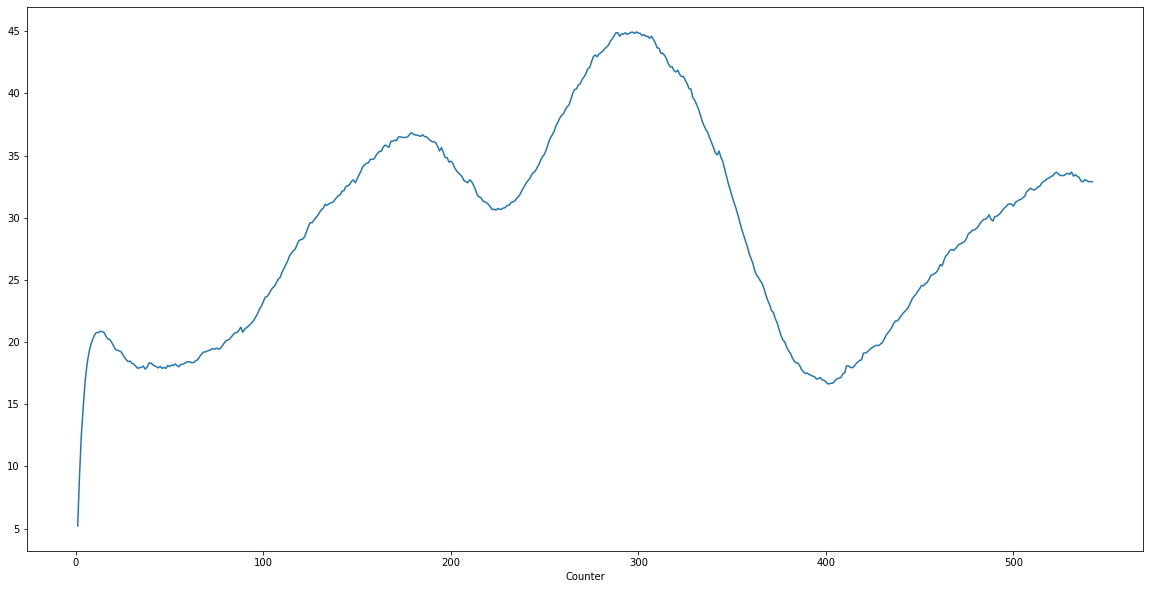

In [80]:
#grafico campo magnetico
data['mag'].plot()

<AxesSubplot:>

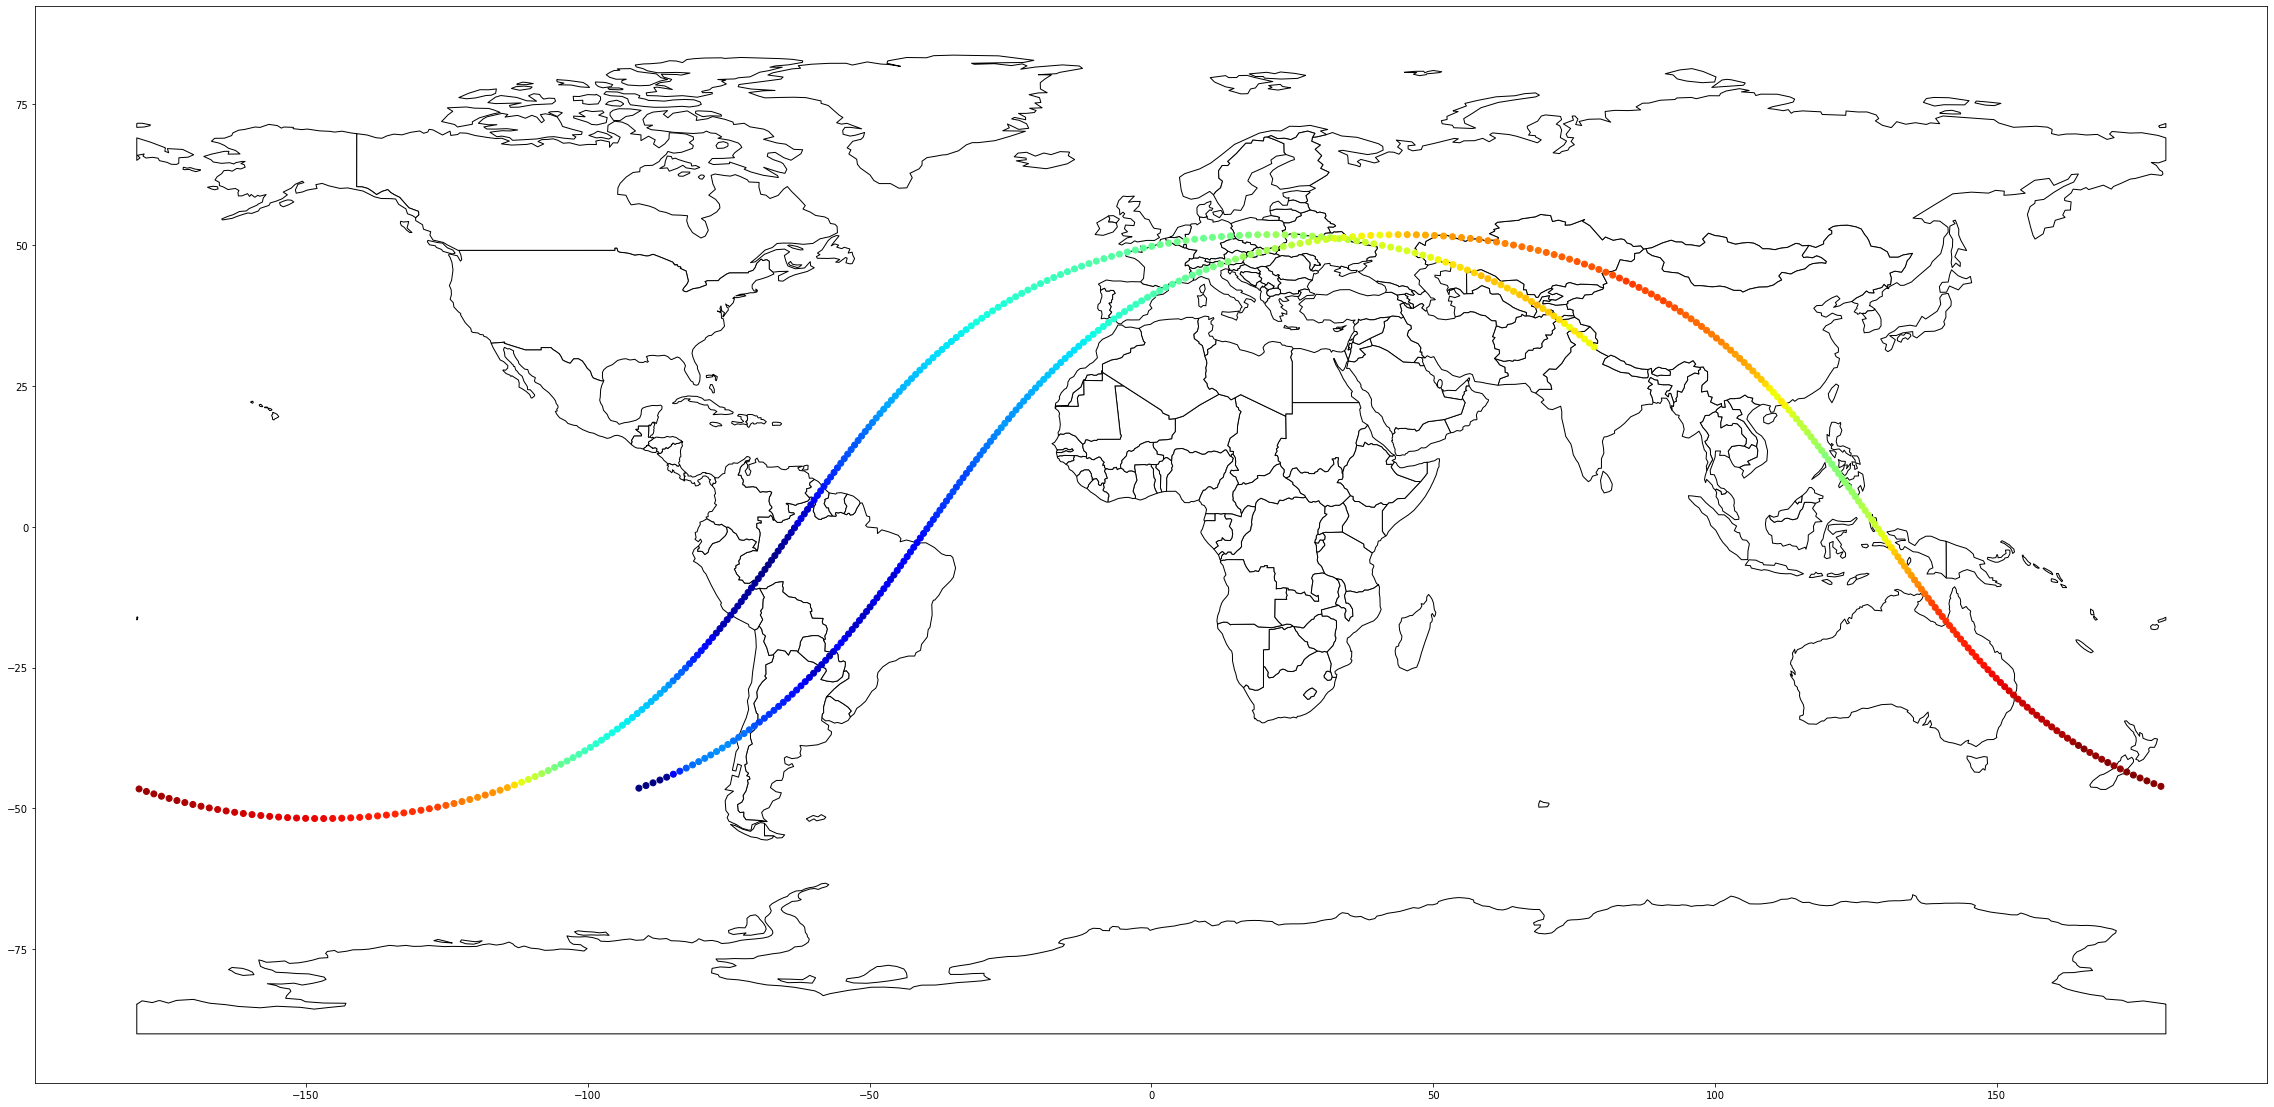

In [81]:
#traiettoria con valori del campo magnetico

data = data.sort_values(by=['mag'])

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['mag'], cmap = 'jet')


<AxesSubplot:>

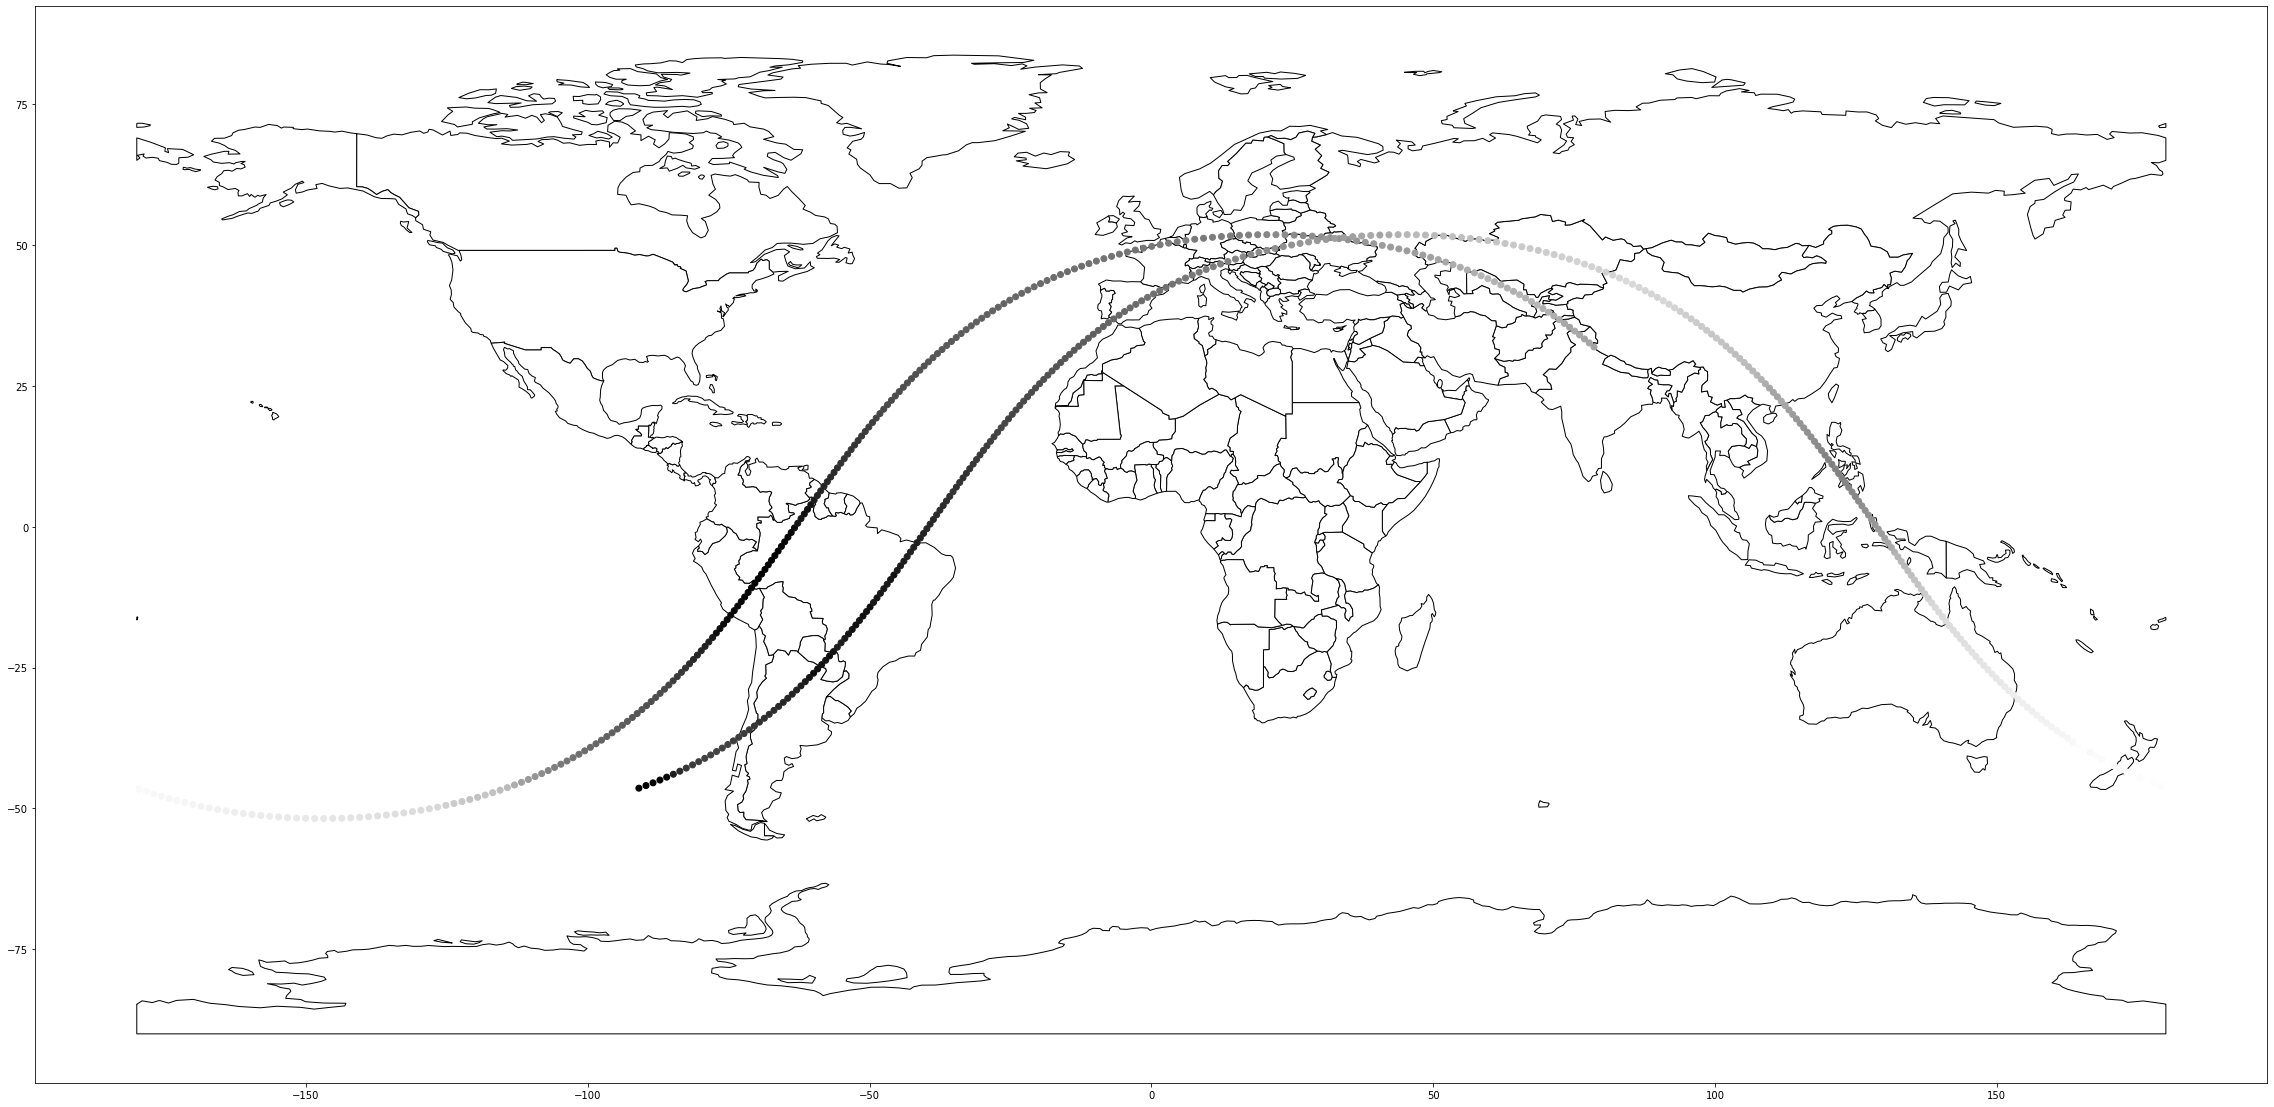

In [82]:
#traiettoria con valori di giorno e notte

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude))

ax = world.plot(color='white', edgecolor='black', figsize=(40,40))

gdf.plot(ax=ax, c = data['Label1'], cmap = 'gist_gray')

<AxesSubplot:xlabel='Longitude', ylabel='mag'>

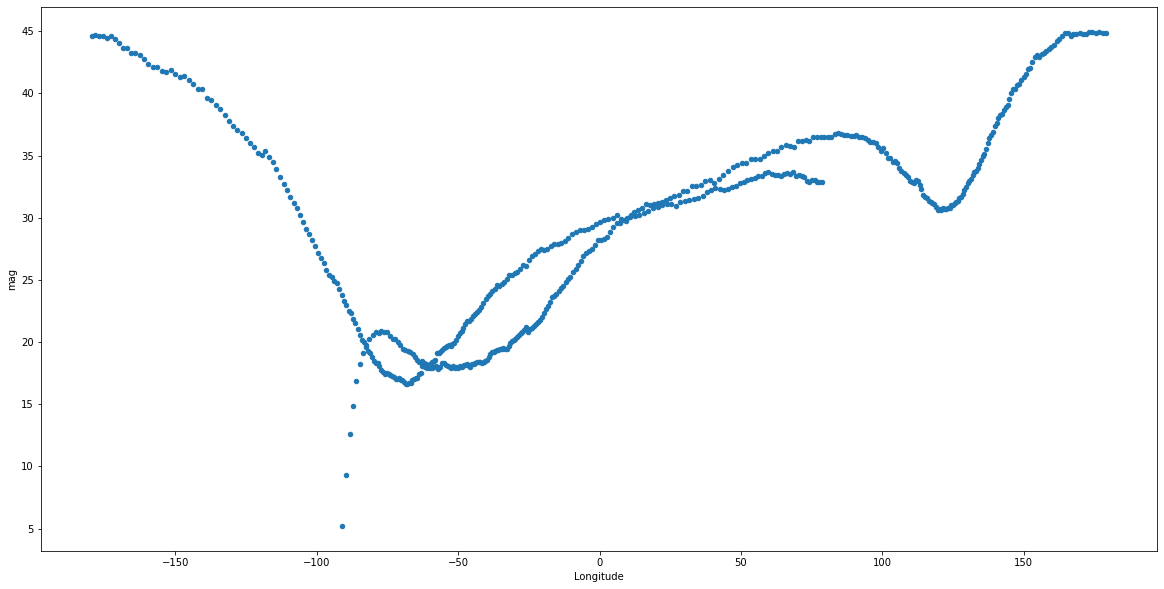

In [83]:
#rapporto longitudine e campo magnetico
data.plot.scatter(x='Longitude', y='mag')

<AxesSubplot:xlabel='Latitude', ylabel='mag'>

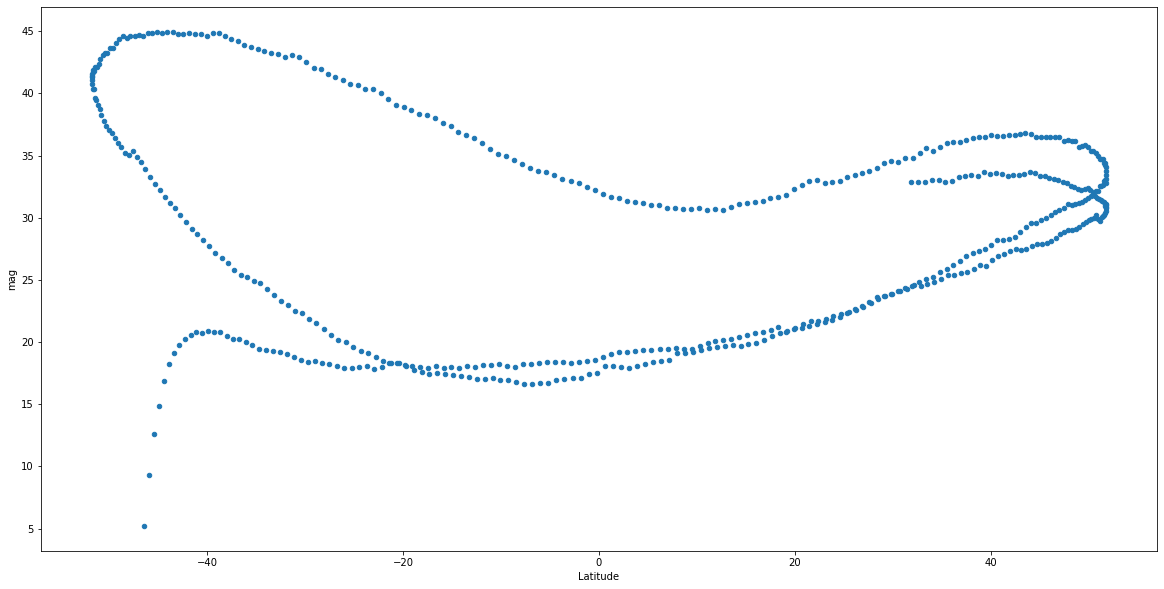

In [84]:
#rapporto latitudine e campo magnetico
data.plot.scatter(x='Latitude', y='mag')

<AxesSubplot:xlabel='Counter'>

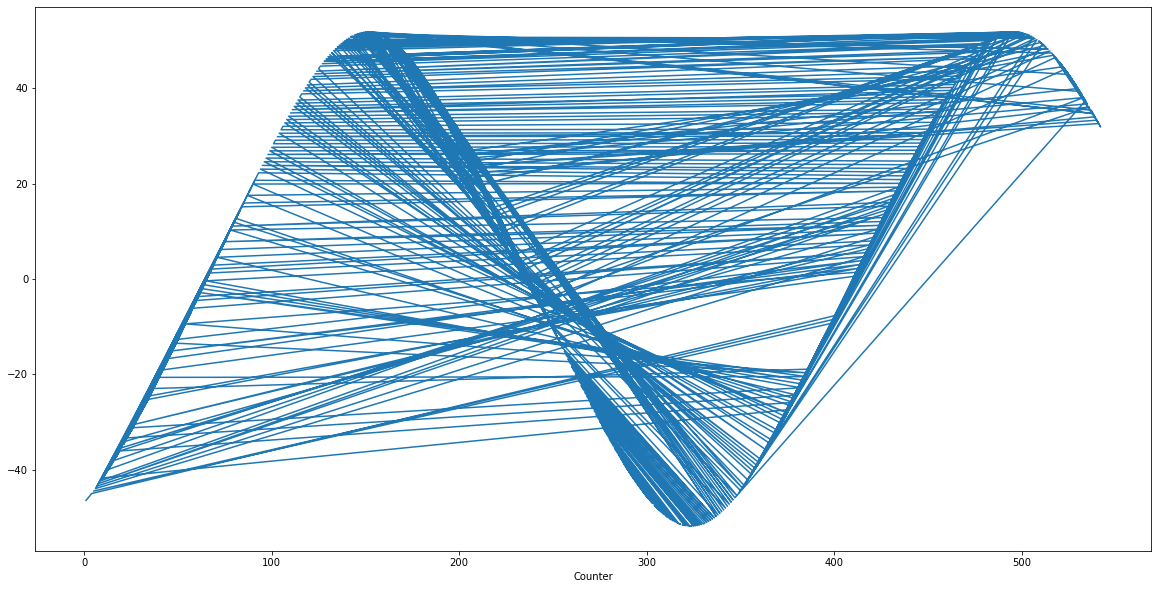

In [85]:
#latitudine
data['Latitude'].plot()

<AxesSubplot:xlabel='Counter'>

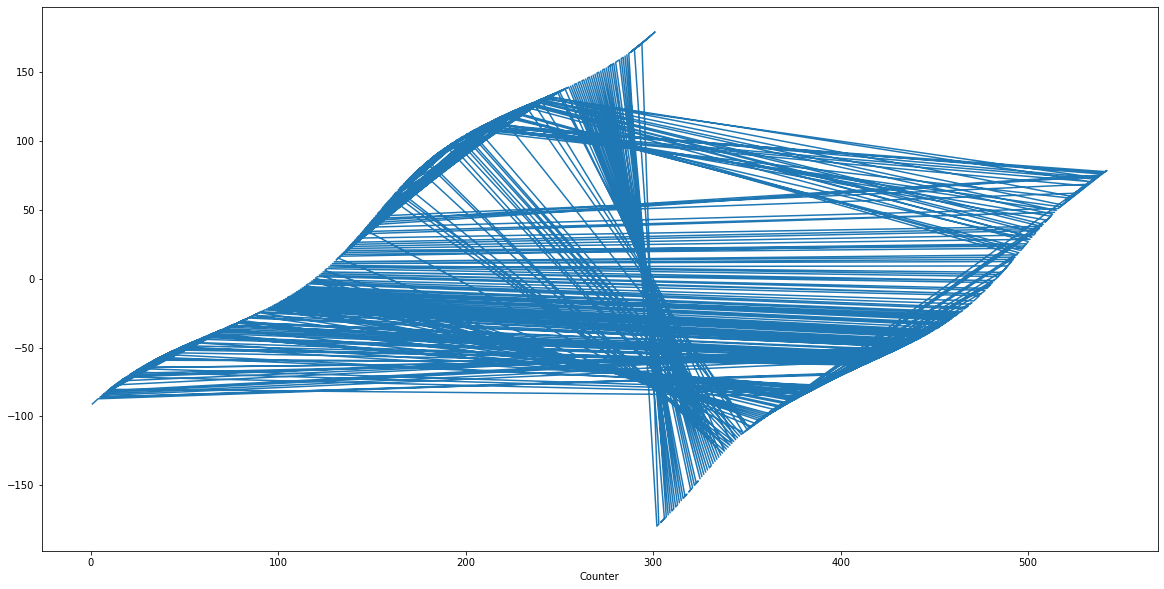

In [86]:
#longitudine
data['Longitude'].plot()

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

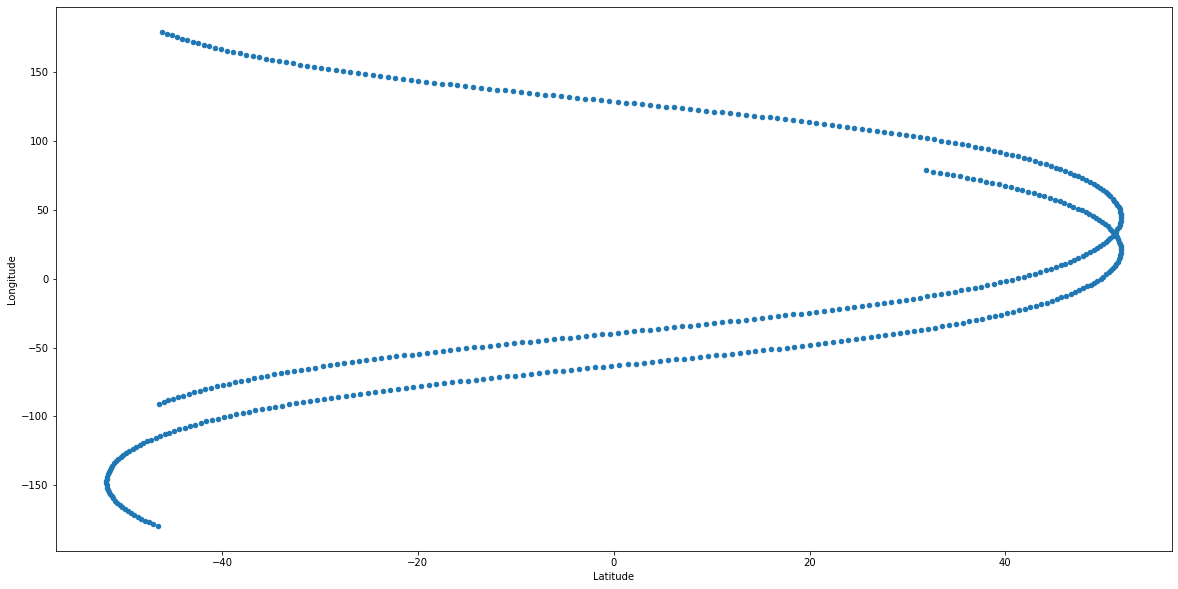

In [87]:
#rapporto latitudine e longitudine
data.plot.scatter(x='Latitude', y='Longitude')

<AxesSubplot:xlabel='Date/time', ylabel='mag'>

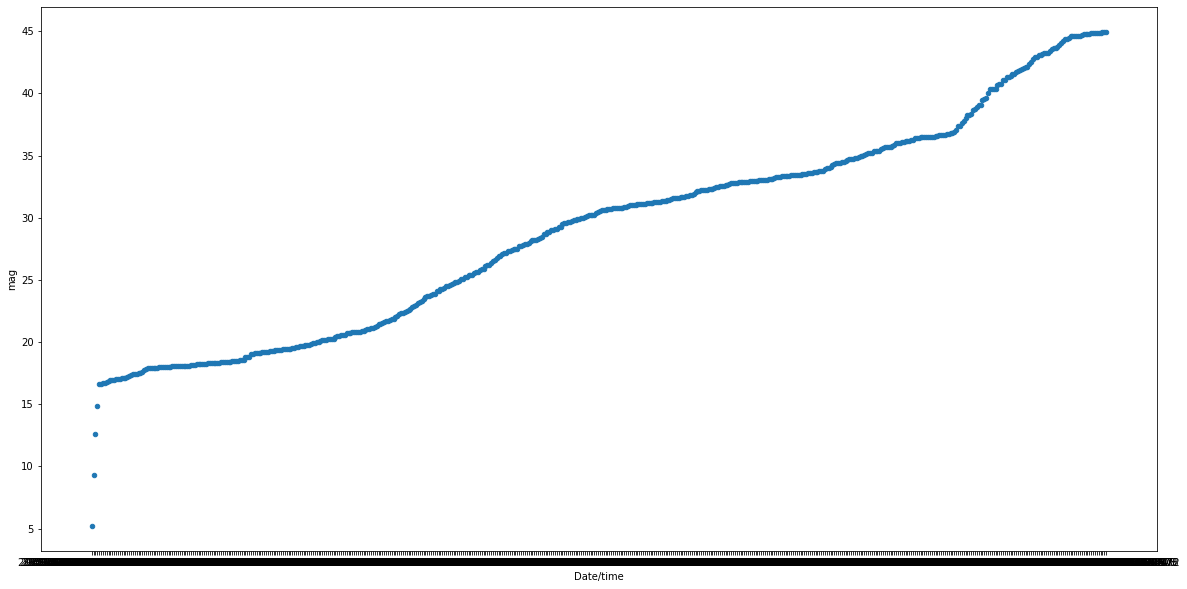

In [88]:
#rapporto tempo e campo magnetico
data.plot.scatter(x='Date/time', y='mag')

In [90]:
data['Counter'] = data.index

In [91]:
data

,Date/time,Latitude,Longitude,Mag_x,Mag_y,Mag_z,Label1,Label2,ndvi,LuminositaNotturna,mag,geometry,Counter
Counter,,,,,,,,,,,,,
1,2022-04-21 05:38:08.013238,-46.409194,-90.915118,1.339141,-2.212412,-4.512149,dark,other,0,35.0,5.200727,POINT (-90.91512 -46.40919),1
2,2022-04-21 05:38:24.138337,-45.946504,-89.655609,2.403312,-4.300591,-7.915128,dark,other,0,48.0,9.323103,POINT (-89.65561 -45.94650),2
3,2022-04-21 05:38:40.263087,-45.464643,-88.408151,3.377218,-5.963129,-10.607705,dark,other,0,201.0,12.628853,POINT (-88.40815 -45.46464),3
4,2022-04-21 05:38:56.370510,-44.967865,-87.183156,4.006250,-7.095662,-12.462585,dark,other,0,77.0,14.890080,POINT (-87.18316 -44.96786),4
401,2022-04-21 07:25:47.270395,-7.611594,-68.552036,10.441921,-12.018019,-4.841310,dark,other,0,6.0,16.640456,POINT (-68.55204 -7.61159),401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2022-04-21 06:56:46.836417,-41.860244,169.695452,-12.109048,-20.332207,-38.135864,light,other,831134,NaN,44.881754,POINT (169.69545 -41.86024),293
289,2022-04-21 06:55:42.165446,-39.452172,165.492632,-13.221554,-20.903975,-37.455215,light,other,776737,NaN,44.885174,POINT (165.49263 -39.45217),289
296,2022-04-21 06:57:35.369478,-43.544466,173.065281,-10.964643,-19.899912,-38.744022,light,other,869401,NaN,44.914687,POINT (173.06528 -43.54447),296


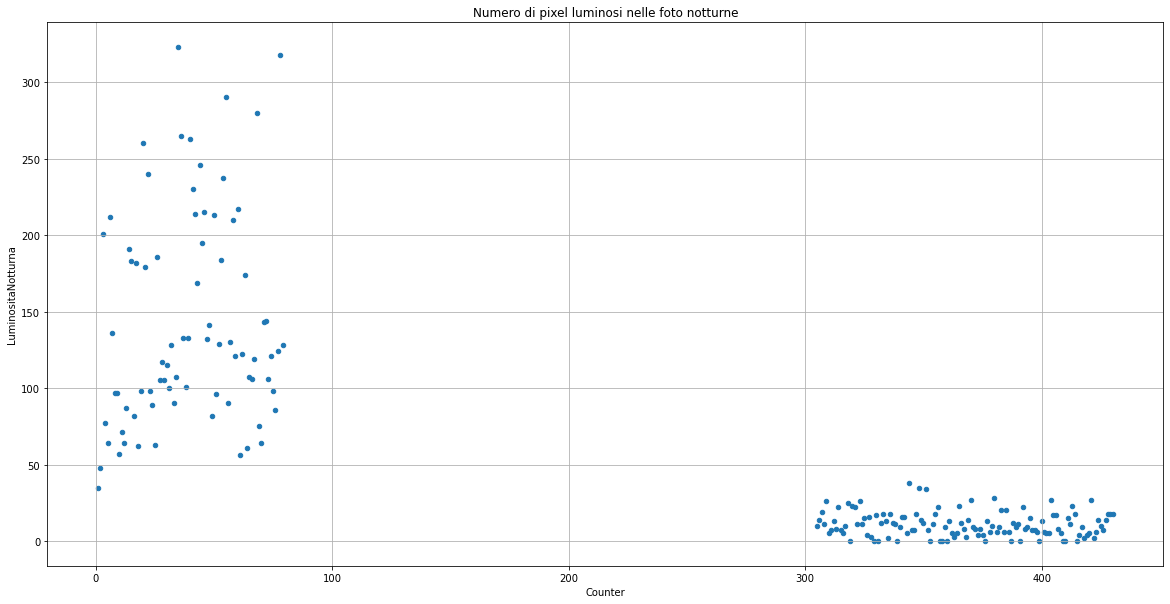

In [92]:
data.plot.scatter(x = 'Counter',y='LuminositaNotturna')
plt.title("Numero di pixel luminosi nelle foto notturne")
plt.grid()

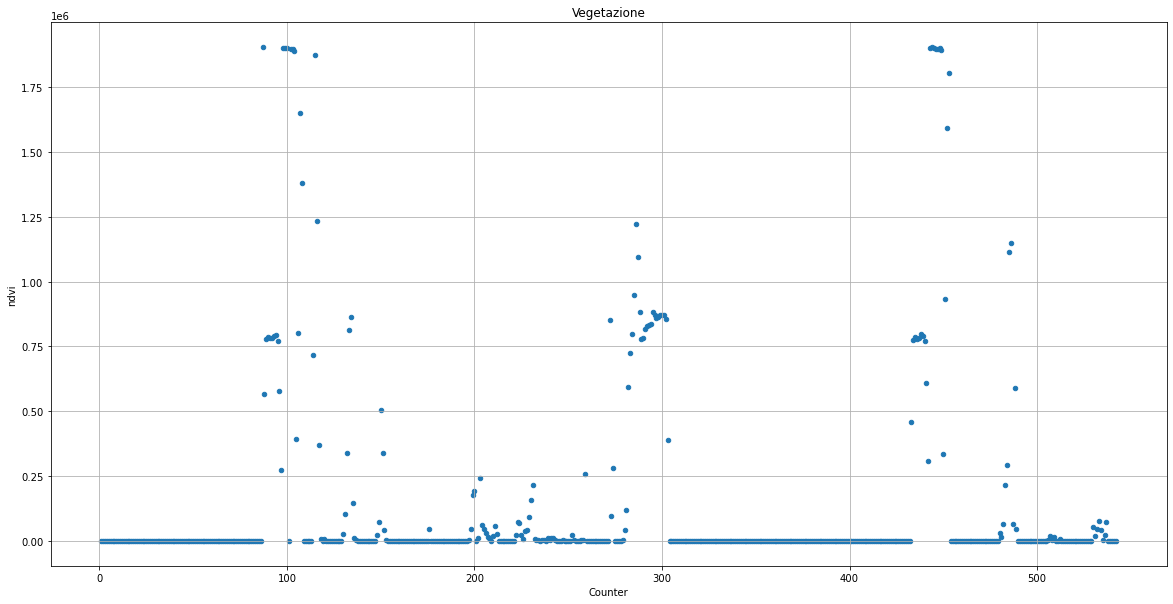

In [95]:
data.plot.scatter(x = 'Counter',y='ndvi')
plt.title("Vegetazione")
plt.grid()